# Effect of Advertising on Sales Linear Regression

## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6) # Set default figure size
%matplotlib inline

c:\Users\serda\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Read Dataset

In [3]:
df = pd.read_csv(r"C:\Users\serda\Desktop\SD RECOVERY\DATA SCIENCE\ML\Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


independent variable = feature = estimator = attribute = input = explanatory variable

dependent variable = target  = label = output = response variable

rows = observation, sample

**features** = {TV, radio, newspaper}

**target** = sales

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()
# Pay attention to the mean/std/min/50%/max values of numeric features.
# Can help realise underlying distribution/outlier situation

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# decriptive statistics in case of 1 outlier
print("mean :", np.mean([100, 110, 120, 400]))
print("std  :", np.std([100, 110, 120, 400]))

mean : 182.5
std  : 125.77261228105267


In [7]:
# decriptive statistics in case of a larger outlier
# notice std got closer to the mean
print("mean :", np.mean([100, 110, 120, 700]))
print("std  :", np.std([100, 110, 120, 700]))

mean : 257.5
std  : 255.57533136044253


In [8]:
# decriptive statistics in case of even a larger outlier
# std got larger than the mean
print("mean :", np.mean([100, 110, 120, 900]))
print("std  :", np.std([100, 110, 120, 900]))

mean : 307.5
std  : 342.153109002388


c:\Users\serda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


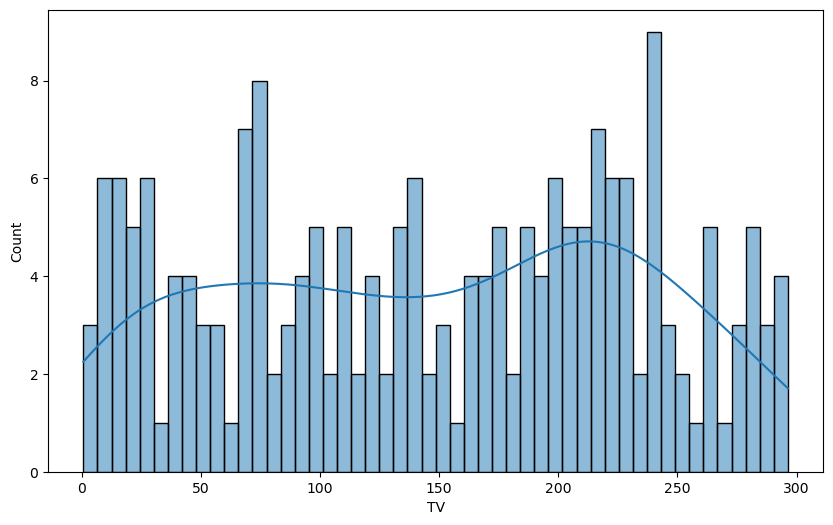

In [9]:
sns.histplot(df.TV, bins=50, kde=True);

# The histogram of a numerical feature can be checked to see
# the distribution of the variable. Doesn't necessarily impact the model performance
# if the variable is not normally distributed, however, can help understand the variable.

<Axes: >

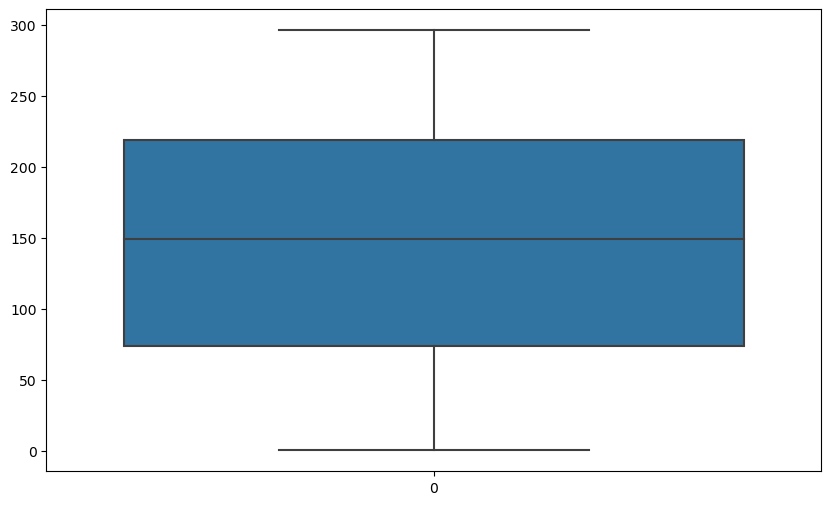

In [10]:
sns.boxplot(df.TV)

# boxplot also tells us about the 25%/median/75% of the variable as well as
# any potential outliers (data points that end up outside of the whiskers)

# In ML, in contrast to statistics, outliers do not mean something is problematic unless there was a systematic failure in data gathering process.
# The only thing we care about is if there are under-represented observation points.

## Create new independent variable (feature)

In [11]:
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]
# Feature engineering also includes methods of deriving new variables from the ones we already have

In [12]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [13]:
df = df.iloc[:,[0,1,2,4,3]]
df.head()

# Reorder the columns so that our target column (sales) is at the end. Eventually becomes a second nature to look for the target variable.

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


## Which feature is more suitable for linear regression?

In [14]:
df["sales"].corr(df["TV"])

# We assume that there's a linear relationship between the independent and dependent variable(s). So long as this assumption holds true,
# the data is more or less suitable for linear regression.

0.7822244248616061

In [15]:
my_dict = {"temperature": [30, 31, 32, 33, 34, 35],
           "ice_cream_sale": [50, 60, 65, 70, 75, 80]}
df1 = pd.DataFrame(my_dict)
df1

,temperature,ice_cream_sale
0,30,50
1,31,60
2,32,65
3,33,70
4,34,75
5,35,80


In [16]:
df1.temperature.corr(df1.ice_cream_sale)

# Correlation tells us how features correlate. Doesn't necessarily formulate the impact amount of an increase/decrease of a variable on the other.

# Regression helps as answer this question: How much of a change will I see if I change temperature variable by one unit.

0.989743318610787

In [17]:
my_dict = {"temperature": [30, 31, 32, 33, 34, 35],
           "ice_cream_sale": [50, 51, 53, 54, 55, 56]}
df2 = pd.DataFrame(my_dict)
df2

,temperature,ice_cream_sale
0,30,50
1,31,51
2,32,53
3,33,54
4,34,55
5,35,56


In [18]:
df2.temperature.corr(df2.ice_cream_sale)

# In the first df, regression coefficient is 5, and corr is 0.9821.
# In the second df, regression coefficient is 1, and corr is 0.9921.
# This proves that correlation doesn't tell us how much a unit of change in one variable changes the other whereas regression does.

0.9921609337929049

In [19]:
for i in df.drop(columns ="sales"):
    print(f"corr between sales and {i:<12}:  {df.sales.corr(df[i])}")

# Check which features have high correlation with the target. Features with high correlations are more useful
# to use in linear regression.

corr between sales and TV          :  0.7822244248616061
corr between sales and radio       :  0.5762225745710551
corr between sales and newspaper   :  0.22829902637616528
corr between sales and total_spend :  0.8677123027017427


c:\Users\serda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\serda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\serda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\serda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

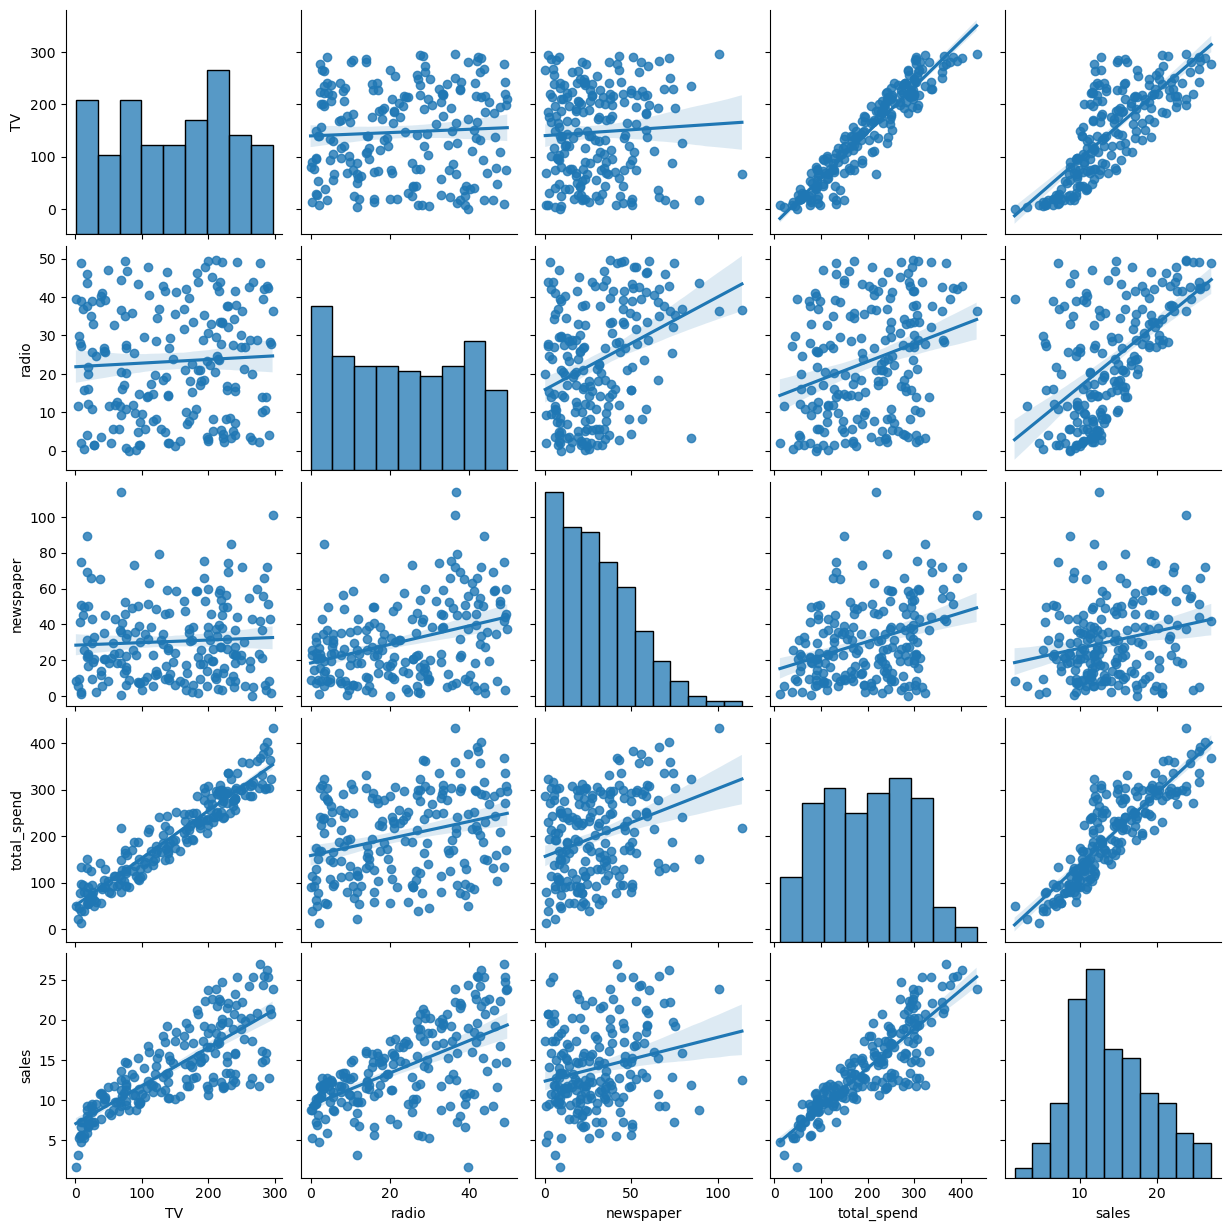

In [20]:
sns.pairplot(df, kind="reg");

# Pairplot also helps us visualise potential correlations between all features.

In [21]:
df.corr()

,TV,radio,newspaper,total_spend,sales
TV,1.000000,0.054809,0.056648,0.945330,0.782224
radio,0.054809,1.000000,0.354104,0.293211,0.576223
newspaper,0.056648,0.354104,1.000000,0.343059,0.228299
total_spend,0.945330,0.293211,0.343059,1.000000,0.867712
sales,0.782224,0.576223,0.228299,0.867712,1.000000


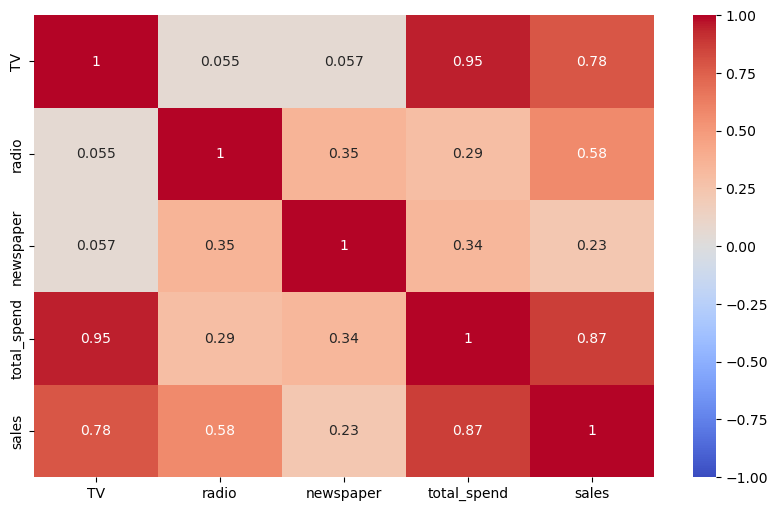

In [22]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm');

In [23]:
df = df[["total_spend", "sales"]]
df

# As the feature `total_spend` has the highest correlation with our target and is a combination of all the other independent features, we
# will go ahead and use it as the only predictor.

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


## Plotting the relationship between independent variable and dependent variable

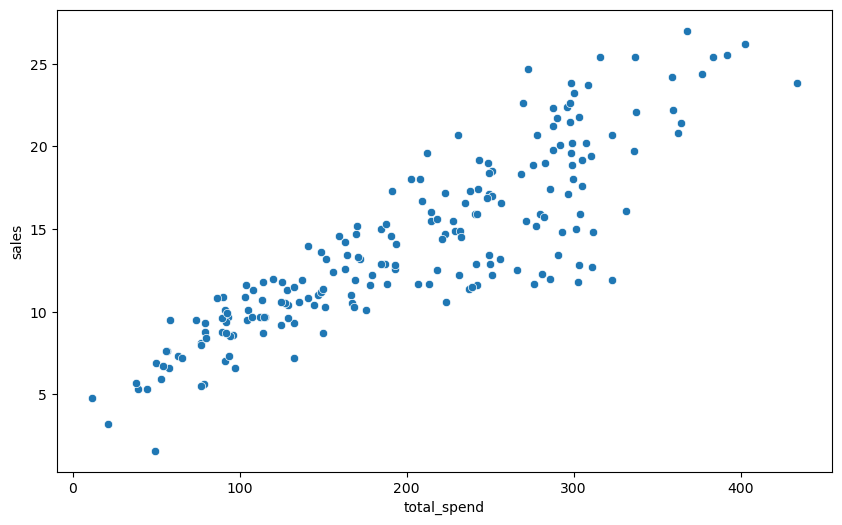

In [24]:
sns.scatterplot(x="total_spend", y="sales", data=df);

# Can also visualise the correlation with scatterplot.

## Correlation between independent variable and dependent variable

In [25]:
corr = df["sales"].corr(df["total_spend"])
corr

0.8677123027017427

In [26]:
df["total_spend"].corr(df["sales"])

# Correlation is completely symmetrical.

0.8677123027017427

## Coefficient of determination (R2)

In [27]:
R2_score = corr**2
R2_score

# R2 score tells us how much of the variation in the target column can be explained with the independent features we have at hand.
# Statistically [0, 1]
# Sklearn [-np.inf, 1]

0.7529246402599608

## Linear Regression

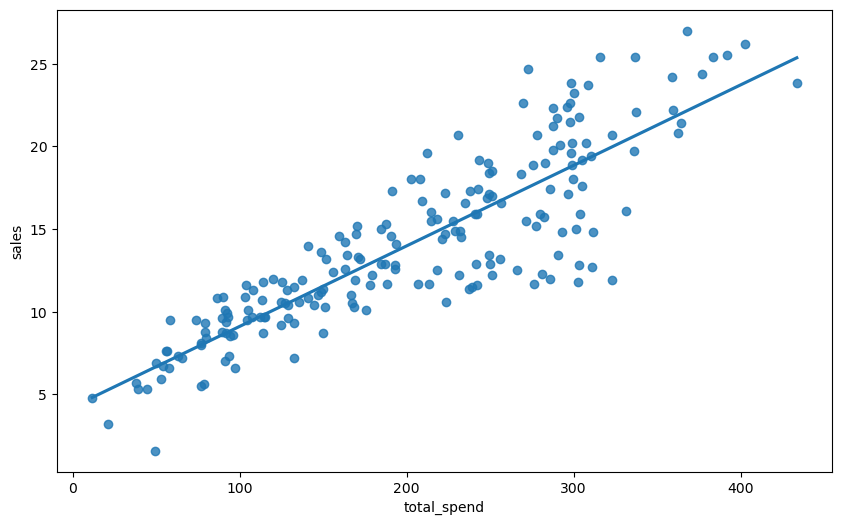

In [28]:
sns.regplot(x="total_spend", y="sales", data=df, ci=None);

# We can use `regplot` from `seaborn` to fit a regression line to this data and visualise it as it's only 2-D.

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [29]:
# y_pred = b1X + b0

In [30]:
X = df["total_spend"]
y = df["sales"]

## Determination of coefficients (slope and intercept)

In [51]:
# As an example: we take the ( y = 9X + 10 + e ) polynomial for 20K samples.
# We know that the best fit line(predicted by sklearn Linear Regression) must have a slope very close to 9 and a y-intercept very close to 10

X= np.random.randn(20000)
y = 10 + 9 * X + np.random.randn(20000)  # the last one is e

In [44]:
X

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: total_spend, Length: 200, dtype: float64

In [45]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

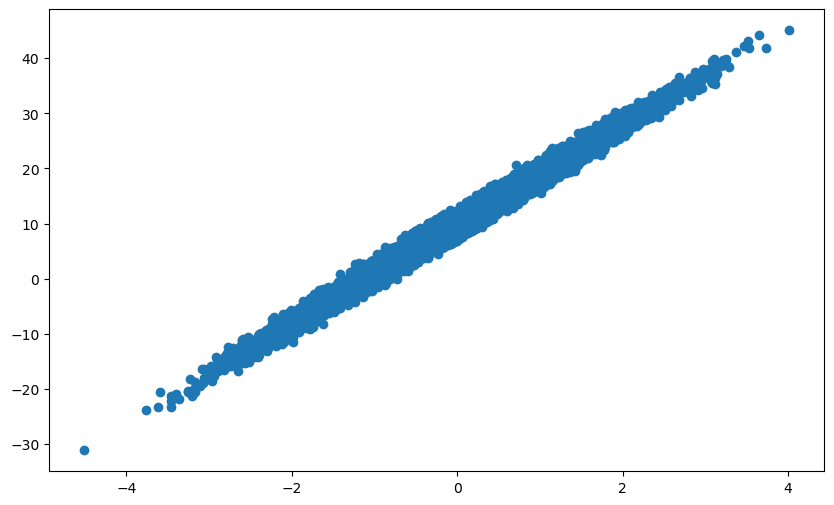

In [48]:
plt.scatter(X,y)
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = pd.DataFrame(X)
y = pd.DataFrame(y)
model.fit(X,y)


LinearRegression()

In [50]:
# We've found the coef and intercept very close to 9 and 10 which is correct
print(model.coef_)
print(model.intercept_)

[[8.99193733]]
[10.0026837]


In [31]:
np.polyfit(X, y, deg=1)

# We can use the `polyfit` function from numpy to calculate the linear regression coefficients. This
# step is redundant and only for training purposes. There are far more useful methods to do this automatically which we will see in the upcoming lectures.

# polyfit means polynomial fit. A polynomial with a degree of 1 is a linear fit. Keep that in mind.

array([0.04868788, 4.24302822])

In [32]:
slope, intercept = np.polyfit(X, y, deg=1)      # y = ax + b

# Slope is the coefficient of our independent feature.
# Intercept is the y value when x=0

In [33]:
print("slope    :", slope)
print("intercept:", intercept)

slope    : 0.04868787931904817
intercept: 4.243028216036326


## Why do we use the least squares error method to find the regression line that best fits the data?

In [34]:
# y_pred = 0.04868787931904817*X + 4.243028216036326

In [35]:
b1, b0 = np.polyfit(X, y, deg=1)

# b1 = slope, b0= intercept

In [36]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 0.04868787931904817
b0 : 4.243028216036326


In [37]:
X

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: total_spend, Length: 200, dtype: float64

In [38]:
y_pred = b1*X + b0

In [39]:
values = {"actual": y, "predicted": y_pred, "residual":y-y_pred, "LSE": (y-y_pred)**2, "ABS":abs(y-y_pred)}
df_2 = pd.DataFrame(values)
df_2


# LSE = least squared errors
# ABS = absolute errors
# Remember that LSE squares the residuals, hence penalises high errors whereas ABS does not do that.

# Which metric to use will depend on your use case. If you have a lot of outliers in the dataset, LSE can be useful.

,actual,predicted,residual,LSE,ABS
0,22.1,20.655712,1.444288,2.085967,1.444288
1,10.4,10.518896,-0.118896,0.014136,0.118896
2,9.3,10.689303,-1.389303,1.930164,1.389303
3,18.5,16.478292,2.021708,4.087302,2.021708
4,12.9,16.414998,-3.514998,12.355211,3.514998
...,...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098,0.645057
196,9.7,9.462369,0.237631,0.056469,0.237631
197,12.8,13.625183,-0.825183,0.680926,0.825183
198,25.5,23.318939,2.181061,4.757026,2.181061


In [40]:
df_2.residual.sum().round()

# Sum of residuals in linear regression will always (almost, considering floating point precision) equal to 0.

-0.0

## Prediction with simple linear regression

In [41]:
potential_spend = np.linspace(0, 500, 100)
potential_spend

# Create a dummy set of observations to get inference (predictions) on. These data points are linearly spaced between 0 and 500.

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [42]:
predicted_sales_lin = b1* potential_spend + b0
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

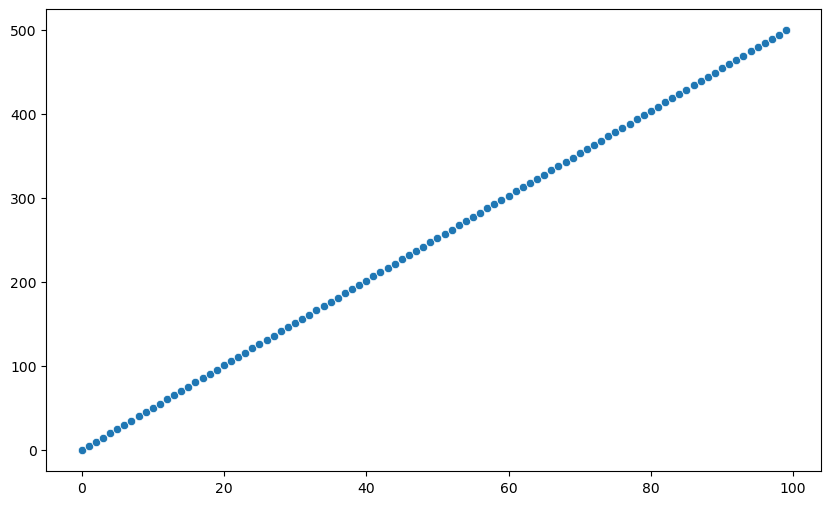

In [43]:
sns.scatterplot(data = potential_spend);